# Machine Learning Project - Breast Cancer Dataset
### CSCI 111 T
##### Butch Adrian Castro, 5 BS CS-DGDD


In [2]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

## Preparing the Dataset, removed label column

In [3]:
# load breast cancer dataset
D1 = pd.read_csv("Breast_cancer_data.csv", index_col=None)
y = D1["diagnosis"]
D1 = D1.drop(columns=["diagnosis"])

### D1 - Original Dataset

In [4]:
D1

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0          17.99         10.38          122.80     1001.0          0.11840
1          20.57         17.77          132.90     1326.0          0.08474
2          19.69         21.25          130.00     1203.0          0.10960
3          11.42         20.38           77.58      386.1          0.14250
4          20.29         14.34          135.10     1297.0          0.10030
..           ...           ...             ...        ...              ...
564        21.56         22.39          142.00     1479.0          0.11100
565        20.13         28.25          131.20     1261.0          0.09780
566        16.60         28.08          108.30      858.1          0.08455
567        20.60         29.33          140.10     1265.0          0.11780
568         7.76         24.54           47.92      181.0          0.05263

[569 rows x 5 columns]

### D2 - MinMax Scaled Dataset

In [5]:
D2 = MinMaxScaler().fit_transform(D1)
D2 = pd.DataFrame(D2,columns=D1.columns)
D2

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0       0.521037      0.022658        0.545989   0.363733         0.593753
1       0.643144      0.272574        0.615783   0.501591         0.289880
2       0.601496      0.390260        0.595743   0.449417         0.514309
3       0.210090      0.360839        0.233501   0.102906         0.811321
4       0.629893      0.156578        0.630986   0.489290         0.430351
..           ...           ...             ...        ...              ...
564     0.690000      0.428813        0.678668   0.566490         0.526948
565     0.622320      0.626987        0.604036   0.474019         0.407782
566     0.455251      0.621238        0.445788   0.303118         0.288165
567     0.644564      0.663510        0.665538   0.475716         0.588336
568     0.036869      0.501522        0.028540   0.015907         0.000000

[569 rows x 5 columns]

### D3 - Standard Scaled Dataset

In [6]:
D3 = StandardScaler().fit_transform(D1)
D3 = pd.DataFrame(D3,columns=D1.columns)
D3

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0       1.097064     -2.073335        1.269934   0.984375         1.568466
1       1.829821     -0.353632        1.685955   1.908708        -0.826962
2       1.579888      0.456187        1.566503   1.558884         0.942210
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553
4       1.750297     -1.151816        1.776573   1.826229         0.280372
..           ...           ...             ...        ...              ...
564     2.110995      0.721473        2.060786   2.343856         1.041842
565     1.704854      2.085134        1.615931   1.723842         0.102458
566     0.702284      2.045574        0.672676   0.577953        -0.840484
567     1.838341      2.336457        1.982524   1.735218         1.525767
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085

[569 rows x 5 columns]

## Classification of Datasets
### KNN Classification - D1


In [7]:
X_train_d1, X_test_d1, y_train_d1, y_test_d1 = train_test_split(D1, y)

In [8]:
knn3_d1 = KNeighborsClassifier(n_neighbors=3)
knn3_d1.fit(X_train_d1, y_train_d1)

KNeighborsClassifier(n_neighbors=3)

In [9]:
knn3_d1_prediction = knn3_d1.predict(X_test_d1)

knn_d1_test_display = X_test_d1.copy()
knn_d1_test_display["knn3"] = knn3_d1_prediction
knn_d1_test_display["diagnosis"] = y_test_d1
knn_d1_test_display

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
443       10.570         18.32           66.82      340.9          0.08142   
239       17.460         39.28          113.40      920.6          0.09812   
181       21.090         26.57          142.70     1311.0          0.11410   
498       18.490         17.52          121.30     1068.0          0.10120   
58        13.050         19.31           82.61      527.2          0.08060   
..           ...           ...             ...        ...              ...   
557        9.423         27.88           59.26      271.3          0.08123   
244       19.400         23.50          129.10     1155.0          0.10270   
516       18.310         20.58          120.80     1052.0          0.10680   
326       14.110         12.88           90.03      616.5          0.09309   
306       13.200         15.82           84.07      537.3          0.08511   

     knn3  diagnosis  
443     1          1  
239     0          0  
181     0          0  
498     0          0  
58      1          1  
..    ...        ...  
557     1          1  
244     0          0  
516     0          0  
326     1          1  
306     1          1  

[143 rows x 7 columns]

##### kNN Accuracy and Confusion Matrix for D1

In [10]:
acc3_d1 = knn3_d1.score(X_test_d1,y_test_d1)
cm3_d1 = confusion_matrix(y_test_d1,knn3_d1_prediction)

print("kNN, k = 3 accuracy: ",acc3_d1)
print("Confusion Matrix:")
print(cm3_d1)

precision_d1 = precision_score(y_test_d1,knn3_d1_prediction)
recall_d1 = recall_score(y_test_d1,knn3_d1_prediction)
print("Precision:", precision_d1)
print("Recall:", recall_d1)
#disp = plot_precision_recall_curve(knn3_d1, X_test_d1, y_test_d1)

kNN, k = 3 accuracy:  0.8671328671328671
Confusion Matrix:
[[42 14]
 [ 5 82]]
Precision: 0.8541666666666666
Recall: 0.9425287356321839


### KNN Classification - D2

In [11]:
X_train_d2, X_test_d2, y_train_d2, y_test_d2 = train_test_split(D2, y)

In [12]:
knn3_d2 = KNeighborsClassifier(n_neighbors=3)
knn3_d2.fit(X_train_d2, y_train_d2)

KNeighborsClassifier(n_neighbors=3)

In [13]:
knn3_d2_prediction = knn3_d2.predict(X_test_d2)

knn_d2_test_display = X_test_d2.copy()
knn_d2_test_display["knn3"] = knn3_d2_prediction
knn_d2_test_display["diagnosis"] = y_test_d2
knn_d2_test_display

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
263     0.408396      0.327021        0.388432   0.260912         0.232644   
475     0.276823      0.203585        0.270196   0.154146         0.340977   
366     0.625633      0.578965        0.621312   0.462566         0.419067   
121     0.552747      0.250592        0.536314   0.395970         0.476393   
449     0.668229      0.365573        0.651717   0.526193         0.399115   
..           ...           ...             ...        ...              ...   
460     0.477969      0.589787        0.465828   0.333998         0.418435   
143     0.280136      0.210010        0.276069   0.156394         0.308206   
334     0.251739      0.314846        0.235575   0.136119         0.275345   
293     0.230442      0.262090        0.219404   0.122672         0.280672   
289     0.207724      0.310450        0.196116   0.107105         0.311456   

     knn3  diagnosis  
263     1          0  
475     1          1  
366     0          0  
121     0          0  
449     0          0  
..    ...        ...  
460     0          0  
143     1          1  
334     1          1  
293     1          1  
289     1          1  

[143 rows x 7 columns]

##### kNN Accuracy and Confusion Matrix for D2

In [14]:
acc3_d2 = knn3_d2.score(X_test_d2,y_test_d2)
cm3_d2 = confusion_matrix(y_test_d2,knn3_d2_prediction)

print("kNN, k = 3 Accuracy: ",acc3_d2)
print("Confusion Matrix:")
print(cm3_d2)

precision_d2 = precision_score(y_test_d2,knn3_d2_prediction)
recall_d2 = recall_score(y_test_d2,knn3_d2_prediction)
print("Precision:", precision_d2)
print("Recall:", recall_d2)


kNN, k = 3 Accuracy:  0.9300699300699301
Confusion Matrix:
[[44  8]
 [ 2 89]]
Precision: 0.9175257731958762
Recall: 0.978021978021978


### KNN Classification - D3


In [15]:
X_train_d3, X_test_d3, y_train_d3, y_test_d3 = train_test_split(D3, y)

In [16]:
knn3_d3 = KNeighborsClassifier(n_neighbors=3)
knn3_d3.fit(X_train_d3, y_train_d3)

KNeighborsClassifier(n_neighbors=3)

In [17]:
knn3_d3_prediction = knn3_d3.predict(X_test_d3)

knn_d3_test_display = X_test_d3.copy()
knn_d3_test_display["knn3"] = knn3_d3_prediction
knn_d3_test_display["diagnosis"] = y_test_d3
knn_d3_test_display

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
483    -0.121357     -0.383884       -0.173371  -0.238305         0.223439   
18      1.613970      0.665623        1.566503   1.720997         0.138753   
480    -0.558739     -0.293129       -0.563442  -0.567652        -0.390718   
495     0.210940      0.214172        0.170979   0.073978        -0.034891   
446     1.028901      2.033938        1.043388   0.929199         0.256887   
..           ...           ...             ...        ...              ...   
129     1.608290      1.356762        1.582979   1.527599         0.365770   
73     -0.092956     -0.814392       -0.063393  -0.201331         0.308838   
437    -0.024792     -0.770177       -0.090167  -0.124256        -0.838349   
455    -0.212241      2.659920       -0.231861  -0.277838        -0.278277   
388    -0.811511     -0.881877       -0.765686  -0.747684        -0.904533   

     knn3  diagnosis  
483     1          1  
18      0          0  
480     1          1  
495     0          1  
446     0          0  
..    ...        ...  
129     0          0  
73      1          0  
437     1          1  
455     1          1  
388     1          1  

[143 rows x 7 columns]

##### kNN Accuracy and Confusion Matrix for D3

In [18]:
acc3_d3 = knn3_d3.score(X_test_d3,y_test_d3)
cm3_d3 = confusion_matrix(y_test_d3,knn3_d3_prediction)

print("kNN, k = 3 accuracy: ",acc3_d3)
print("Confusion Matrix:")
print(cm3_d3)

precision_d3 = precision_score(y_test_d3,knn3_d3_prediction)
recall_d3 = recall_score(y_test_d3,knn3_d3_prediction)
print("Precision:", precision_d3)
print("Recall:", recall_d3)


kNN, k = 3 accuracy:  0.8881118881118881
Confusion Matrix:
[[45 12]
 [ 4 82]]
Precision: 0.8723404255319149
Recall: 0.9534883720930233


### Decision Tree Classification - D1

In [19]:
data_features = ["mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness"]
dt_classifier_d1 = tree.DecisionTreeClassifier()
dt_classifier_d1 = dt_classifier_d1.fit(X_train_d1, y_train_d1)

fig_d1, axes_d1 = plt.subplots(nrows=1,ncols=1,figsize=(4,6),dpi=2000)
plot_tree(dt_classifier_d1, filled=True, feature_names=data_features, class_names=["0","1"], ax=axes_d1)
plt.show()

In [20]:
dt_prediction_d1 = dt_classifier_d1.predict(X_test_d1)
dt_accuracy_d1 = dt_classifier_d1.score(X_test_d1,y_test_d1)
dt_cm_d1 = confusion_matrix(y_test_d1, dt_prediction_d1)

print("Accuracy: ", dt_accuracy_d1)
print("Confusion Matrix:")
print(dt_cm_d1)

dt_precision_d1 = precision_score(y_test_d1,dt_prediction_d1)
dt_recall_d1 = recall_score(y_test_d1,dt_prediction_d1)
print("Precision:", dt_precision_d1)
print("Recall:", dt_recall_d1)

Accuracy:  0.8881118881118881
Confusion Matrix:
[[45 11]
 [ 5 82]]
Precision: 0.8817204301075269
Recall: 0.9425287356321839


### Decision Tree Classifier - D2

In [21]:
dt_classifier_d2 = tree.DecisionTreeClassifier()
dt_classifier_d2 = dt_classifier_d2.fit(X_train_d2, y_train_d2)

fig_d2, axes_d2 = plt.subplots(nrows=1,ncols=1,figsize=(4,6),dpi=2000)
plot_tree(dt_classifier_d2, filled=True, feature_names=data_features, class_names=["0","1"], ax=axes_d2)
plt.show()

In [22]:
dt_prediction_d2 = dt_classifier_d2.predict(X_test_d2)
dt_accuracy_d2 = dt_classifier_d2.score(X_test_d2,y_test_d2)
dt_cm_d2 = confusion_matrix(y_test_d2, dt_prediction_d2)

print("Accuracy: ", dt_accuracy_d2)
print("Confusion Matrix:")
print(dt_cm_d2)

dt_precision_d2 = precision_score(y_test_d2,dt_prediction_d2)
dt_recall_d2 = recall_score(y_test_d2,dt_prediction_d2)
print("Precision:", dt_precision_d2)
print("Recall:", dt_recall_d2)

Accuracy:  0.9020979020979021
Confusion Matrix:
[[42 10]
 [ 4 87]]
Precision: 0.8969072164948454
Recall: 0.9560439560439561


### Decision Tree Classifier - D3

In [23]:
dt_classifier_d3 = tree.DecisionTreeClassifier()
dt_classifier_d3 = dt_classifier_d3.fit(X_train_d3, y_train_d3)

fig_d3, axes_d3 = plt.subplots(nrows=1,ncols=1,figsize=(4,6),dpi=2000)
plot_tree(dt_classifier_d3, filled=True, feature_names=data_features, class_names=["0","1"], ax=axes_d3)
plt.show()

In [24]:
dt_prediction_d3 = dt_classifier_d3.predict(X_test_d3)
dt_accuracy_d3 = dt_classifier_d3.score(X_test_d3,y_test_d3)
dt_cm_d3 = confusion_matrix(y_test_d3, dt_prediction_d3)

print("Accuracy: ", dt_accuracy_d3)
print("Confusion Matrix:")
print(dt_cm_d3)

dt_precision_d3 = precision_score(y_test_d3,dt_prediction_d3)
dt_recall_d3 = recall_score(y_test_d3,dt_prediction_d3)
print("Precision:", dt_precision_d3)
print("Recall:", dt_recall_d3)

Accuracy:  0.9090909090909091
Confusion Matrix:
[[51  6]
 [ 7 79]]
Precision: 0.9294117647058824
Recall: 0.9186046511627907


#### Conclusion for best model
##### I think that the best model for this is kNN, with a k=3, because of its consistently high recall values. Having a high recall value indicates the high chance of getting a low number of false negatives, which would be much more appropriate because missing the early predictors of cancer is much more devastating to the patient than mistaking them to have cancer but when they really don't.

## Clustering of Datasets
### K-Means Clustering - D1

In [25]:
k_range_d1 = range(2, 15)

highest_score_d1 = -1
highest_k_d1 = -1

for k in k_range_d1:
    km_model = KMeans(n_clusters=k,n_init='auto',random_state=0)
    km_model.fit(D1)
    km_labels = km_model.predict(D1)
    avg = silhouette_score(D1, km_labels)
    print((k, round(avg, 4)))

    if avg > highest_score_d1:
        highest_score_d1 = avg
        highest_k_d1 = k

print("K = " + str(highest_k_d1))
print("Score = " + str(highest_score_d1))


(2, 0.6991)
(3, 0.6627)
(4, 0.5588)
(5, 0.5443)
(6, 0.5334)
(7, 0.5361)
(8, 0.5515)
(9, 0.5433)
(10, 0.5274)
(11, 0.5282)
(12, 0.5279)
(13, 0.5295)
(14, 0.5428)
K = 2
Score = 0.699135645499053


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


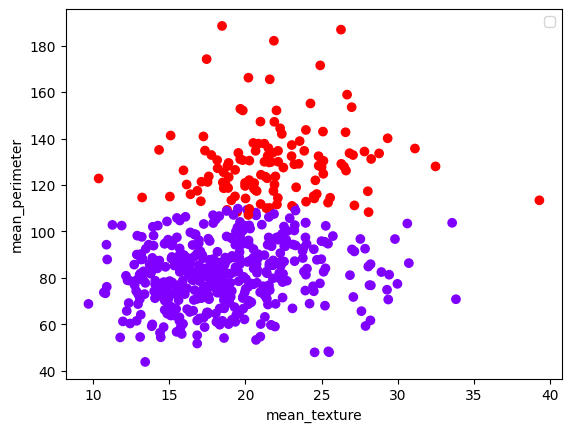

In [26]:
kmeans_d1 = KMeans(n_clusters=highest_k_d1,n_init=10,random_state=0).fit(D1)
kmeans_d1.fit(D1)

plt.scatter(D1["mean_texture"], D1["mean_perimeter"], c=kmeans_d1.labels_, cmap="rainbow")
plt.xlabel("mean_texture")
plt.ylabel("mean_perimeter")
plt.legend()
plt.show()

#### K-Means Clustering - D2

In [27]:
k_range_d2 = range(2, 15)

highest_score_d2 = -1
highest_k_d2 = -1

for k in k_range_d2:
    km_model = KMeans(n_clusters=k,n_init='auto',random_state=0)
    km_model.fit(D2)
    km_labels = km_model.predict(D2)
    avg = silhouette_score(D2, km_labels)
    print((k, round(avg, 4)))

    if avg > highest_score_d2:
        highest_score_d2 = avg
        highest_k_d2 = k

print("K = " + str(highest_k_d2))
print("Score = " + str(highest_score_d2))


(2, 0.4712)
(3, 0.281)
(4, 0.2462)
(5, 0.2542)
(6, 0.2665)
(7, 0.2605)
(8, 0.24)
(9, 0.242)
(10, 0.2151)
(11, 0.2185)
(12, 0.2105)
(13, 0.2158)
(14, 0.2204)
K = 2
Score = 0.47115005833554996


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


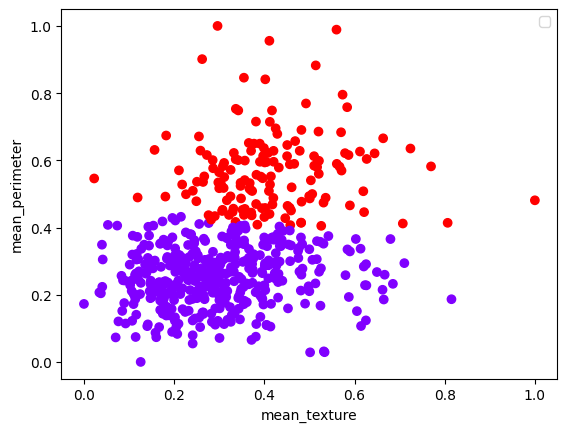

In [28]:
kmeans_d2 = KMeans(n_clusters=highest_k_d2,n_init=10,random_state=0).fit(D2)
kmeans_d2.fit(D2)

plt.scatter(D2["mean_texture"], D2["mean_perimeter"], c=kmeans_d2.labels_, cmap="rainbow")
plt.xlabel("mean_texture")
plt.ylabel("mean_perimeter")
plt.legend()
plt.show()

#### K-Means Clustering - D3

In [29]:
k_range_d3 = range(2, 15)

highest_score_d3 = -1
highest_k_d3 = -1

for k in k_range_d3:
    km_model = KMeans(n_clusters=k,n_init='auto',random_state=0)
    km_model.fit(D3)
    km_labels = km_model.predict(D3)
    avg = silhouette_score(D3, km_labels)
    print((k, round(avg, 4)))

    if avg > highest_score_d3:
        highest_score_d3 = avg
        highest_k_d3 = k

print("K = " + str(highest_k_d3))
print("Score = " + str(highest_score_d3))


(2, 0.4335)
(3, 0.2751)
(4, 0.2539)
(5, 0.2647)
(6, 0.2693)
(7, 0.2471)
(8, 0.244)
(9, 0.2365)
(10, 0.2357)
(11, 0.227)
(12, 0.2266)
(13, 0.2237)
(14, 0.2249)
K = 2
Score = 0.43352924730804543


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


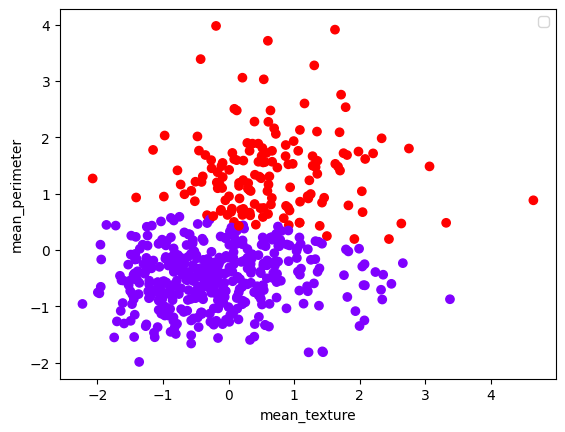

In [30]:
kmeans_d3 = KMeans(n_clusters=highest_k_d3,n_init=10,random_state=0).fit(D3)
kmeans_d3.fit(D3)

plt.scatter(D3["mean_texture"], D3["mean_perimeter"], c=kmeans_d3.labels_, cmap="rainbow")
plt.xlabel("mean_texture")
plt.ylabel("mean_perimeter")
plt.legend()
plt.show()